The raw data of dwelling lifetime is not cleaned even though it also contain year 2051-2100.
The standard deviation for 1600-1799 is modelled with regression and merged into the data.
The same is done for average lifetime. The trend was linear for the raw data and therefore linear regression was chosen.

The linear relationship can be expressed with this function (from warm_up_15):

\begin{equation}
    \textbf{Y} = \beta \textbf{X}+ \epsilon
\end{equation}

To do the regression B must be found.

In [40]:
# All imports
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.stats import norm #for normal distribution
#import statsmodels.api as sm #for linear regression
import matplotlib.pyplot as plt
import math as ma

import os
from pathlib import Path
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [41]:
#* Define paths
directory_path = Path('../../../')

In [42]:
raw_data = pd.read_excel(
    directory_path / 'data' / 'raw_data' / 'Dwelling_Lifetime' / 'lifetime_raw_data_new.xlsx',
    header=0)

new_header = ['year', 'lifetime', 'sigma'] # Assigning new names to the header
raw_data.columns = new_header

# Remove the last 50 rows (years 2051-2100)
raw_data = raw_data.iloc[:-50]

# defining the parameters as np.arrays
year = np.array(raw_data.year)
lifetime = np.array(raw_data.lifetime)
sigma = np.array(raw_data.sigma)

# Display the DataFrame with updated column names
raw_data.tail()

,year,lifetime,sigma
246,2046,96,0.201818
247,2047,96,0.201818
248,2048,96,0.201818
249,2049,96,0.201818
250,2050,96,0.201818


In [43]:
#Calculate standard devision column by multiplying mean lifetime with sigma:
raw_data['std_dev'] = raw_data['lifetime'] * raw_data['sigma']
std_dev = raw_data['std_dev']

# Remove the 'sigma' column
raw_data = raw_data.drop('sigma', axis=1)

raw_data.head()

,year,lifetime,std_dev
0,1800,150,45.0
1,1801,150,45.0
2,1802,150,45.0
3,1803,150,45.0
4,1804,150,45.0


In [44]:
# Save the cleaned dataframe to a new Excel file
raw_data.to_excel(directory_path / 
                 'Data/cleaned_and_combined_data/Dwelling_Lifetime/Cleaned_Dwelling_Lifetime.xlsx')

In [45]:
'''#Plot of the raw data for standard deviation without regression
plt.figure(figsize=(16,10))
plt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')
plt.xlabel('Year')
plt.ylabel('Standard deviation')
plt.title('Raw data Standard deviation - visualization')
plt.legend(loc = 'best')
plt.show()'''

"#Plot of the raw data for standard deviation without regression\nplt.figure(figsize=(16,10))\nplt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')\nplt.xlabel('Year')\nplt.ylabel('Standard deviation')\nplt.title('Raw data Standard deviation - visualization')\nplt.legend(loc = 'best')\nplt.show()"

In [47]:
# defining the parameters as np.arrays (one more time)
year = np.array(raw_data.year)
lifetime = np.array(raw_data.lifetime)
std_dev = np.array(raw_data.std_dev)

Regression for standard deviation 1600-2050 (polynomial):

 the polynomial our fit created is: 
           4             3          2
2.412e-08 x - 0.0001785 x + 0.4943 x - 606.6 x + 2.785e+05.


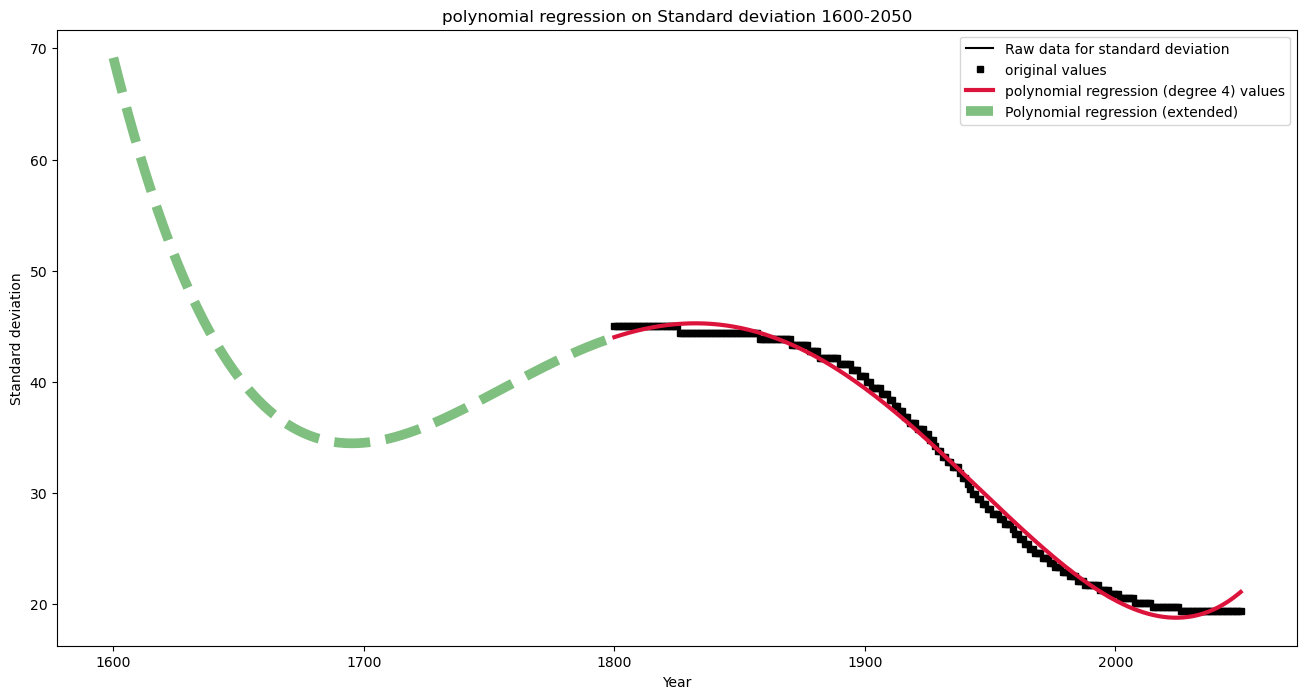

In [48]:
plt.figure(figsize=(16,8))
#add plot and labels here
plt.plot(year, std_dev, color='black', markersize=5, label='Raw data for standard deviation')
plt.xlabel('Year')
plt.ylabel('Standard deviation')

#-------------------------------------------------------
#Polinominal regression:
inputs = year
outputs = std_dev
std_dev_p = outputs
pred_inputs = year

#perform regression:
#set degreee:
degree = 4
#find polynomial
polynomial = np.poly1d(np.polyfit(year, std_dev, degree))
print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
pred_outputs_std_dev_p = polynomial(year)

plt.plot(year, std_dev_p, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs, pred_outputs_std_dev_p, color = 'crimson', lw = 3, label = f'polynomial regression (degree {degree}) values')
plt.legend(loc = 'best')

#-------------------------------------------------------

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
p_reg_std_dev = polynomial(reg_years)


# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, p_reg_std_dev, '--', lw=7, alpha=0.5, color='green', label='Polynomial regression (extended)')
plt.legend(loc='best')

#--------------------------------------------------------

plt.title('polynomial regression on Standard deviation 1600-2050')
plt.show()

Lifetime:

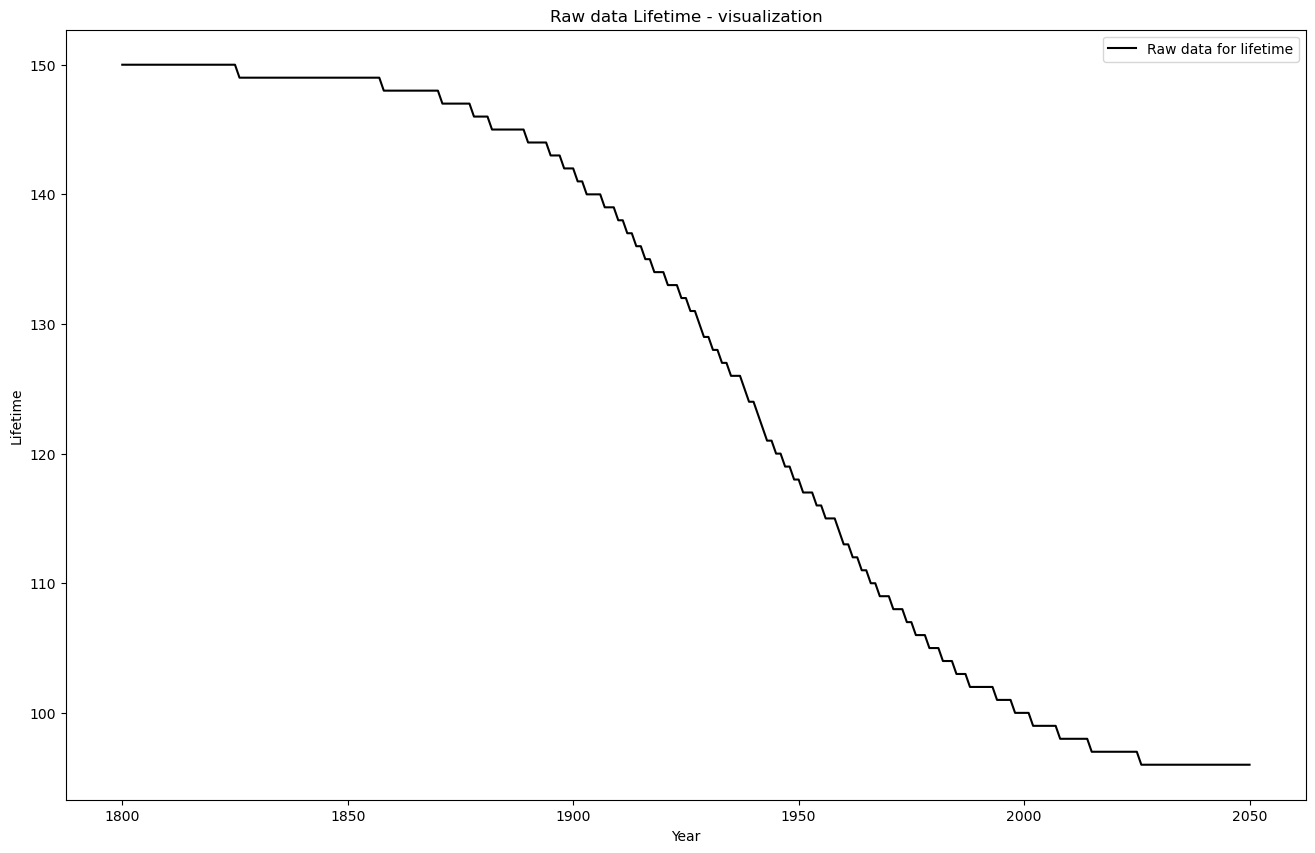

In [31]:
#Plot of the raw data for lifetime without regression
plt.figure(figsize=(16,10))
plt.plot(year, lifetime, color = 'black', markersize = 5, label = f'Raw data for lifetime')
plt.xlabel('Year')
plt.ylabel('Lifetime')
plt.title('Raw data Lifetime - visualization')
plt.legend(loc = 'best')
plt.show()

Regression for lifetime 1600-2050 (polinomial):

 the polynomial our fit created is: 
           4             3         2
6.983e-08 x - 0.0005235 x + 1.469 x - 1829 x + 8.529e+05.


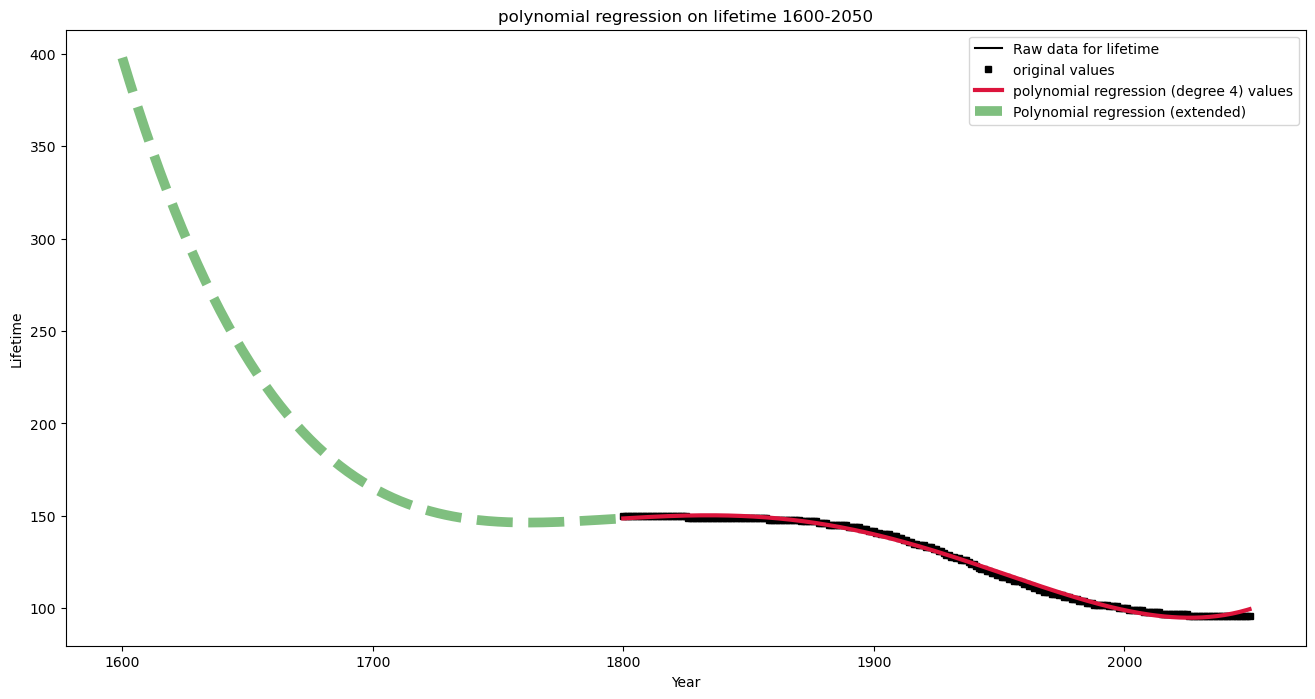

In [49]:
plt.figure(figsize=(16,8))
#add plot and labels here
plt.plot(year, lifetime, color='black', markersize=5, label='Raw data for lifetime')
plt.xlabel('Year')
plt.ylabel('Lifetime')

#-------------------------------------------------------
#Polinominal regression:
inputs = year
outputs = lifetime
std_dev_p = outputs
pred_inputs = year

#perform regression:
#set degreee:
degree = 4
#find polynomial
polynomial = np.poly1d(np.polyfit(year, lifetime, degree))
print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
pred_outputs_lifetime_p = polynomial(year)

plt.plot(year, std_dev_p, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs, pred_outputs_lifetime_p, color = 'crimson', lw = 3, label = f'polynomial regression (degree {degree}) values')
plt.legend(loc = 'best')

#-------------------------------------------------------

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
p_reg_lifetime = polynomial(reg_years)


# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, p_reg_lifetime, '--', lw=7, alpha=0.5, color='green', label='Polynomial regression (extended)')
plt.legend(loc='best')

#--------------------------------------------------------

plt.title('polynomial regression on lifetime 1600-2050')
plt.show()

Save and combine the new values with the raw data in a new dataframe:

In [22]:
# Create a combined DataFrame for all values
extended_data = pd.DataFrame({
    'year': reg_years,
    'lifetime': p_reg_lifetime,
    'std_dev': p_reg_std_dev
})

# Concatenate the original DataFrame with the extended DataFrame
combined_data = pd.concat([extended_data, raw_data])

combined_data = combined_data.set_index('year')

# Display the combined_data DataFrame
#print(extended_data)
print(combined_data)

        lifetime    std_dev
year                       
1600  186.666667  62.310417
1601  186.483333  62.220694
1602  186.300000  62.130972
1603  186.116667  62.041250
1604  185.933333  61.951528
...          ...        ...
2046  104.900000  22.868200
2047  104.716667  22.793328
2048  104.533333  22.718578
2049  104.350000  22.643950
2050  104.166667  22.569444

[451 rows x 2 columns]


In [23]:
# Save the merged dataframe to a new Excel file
combined_data.to_excel(directory_path / 
                 'Data/regression_data/Dwelling_Lifetime/p_regression_Dwelling_Lifetime.xlsx')

#excel_filename = 'regression_Dwelling_Lifetime.xlsx'
#combined_data.to_excel(excel_filename, index=False)